# Set up and Data Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
id_raw_df   = pd.read_csv("..input/train_identity.csv")
id_trans_df = pd.read_csv("..input/train_transaction.csv")

# Data Prep and Exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
id_raw_df.shape

(144233, 41)

In [5]:
id_trans_df.shape

(590540, 394)

In [6]:
train_full_df = pd.merge(id_trans_df, id_raw_df, on='TransactionID', how='left')

In [7]:
train_full_df.shape

(590540, 434)

In [8]:
len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

3.4990009144173126

### NA values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

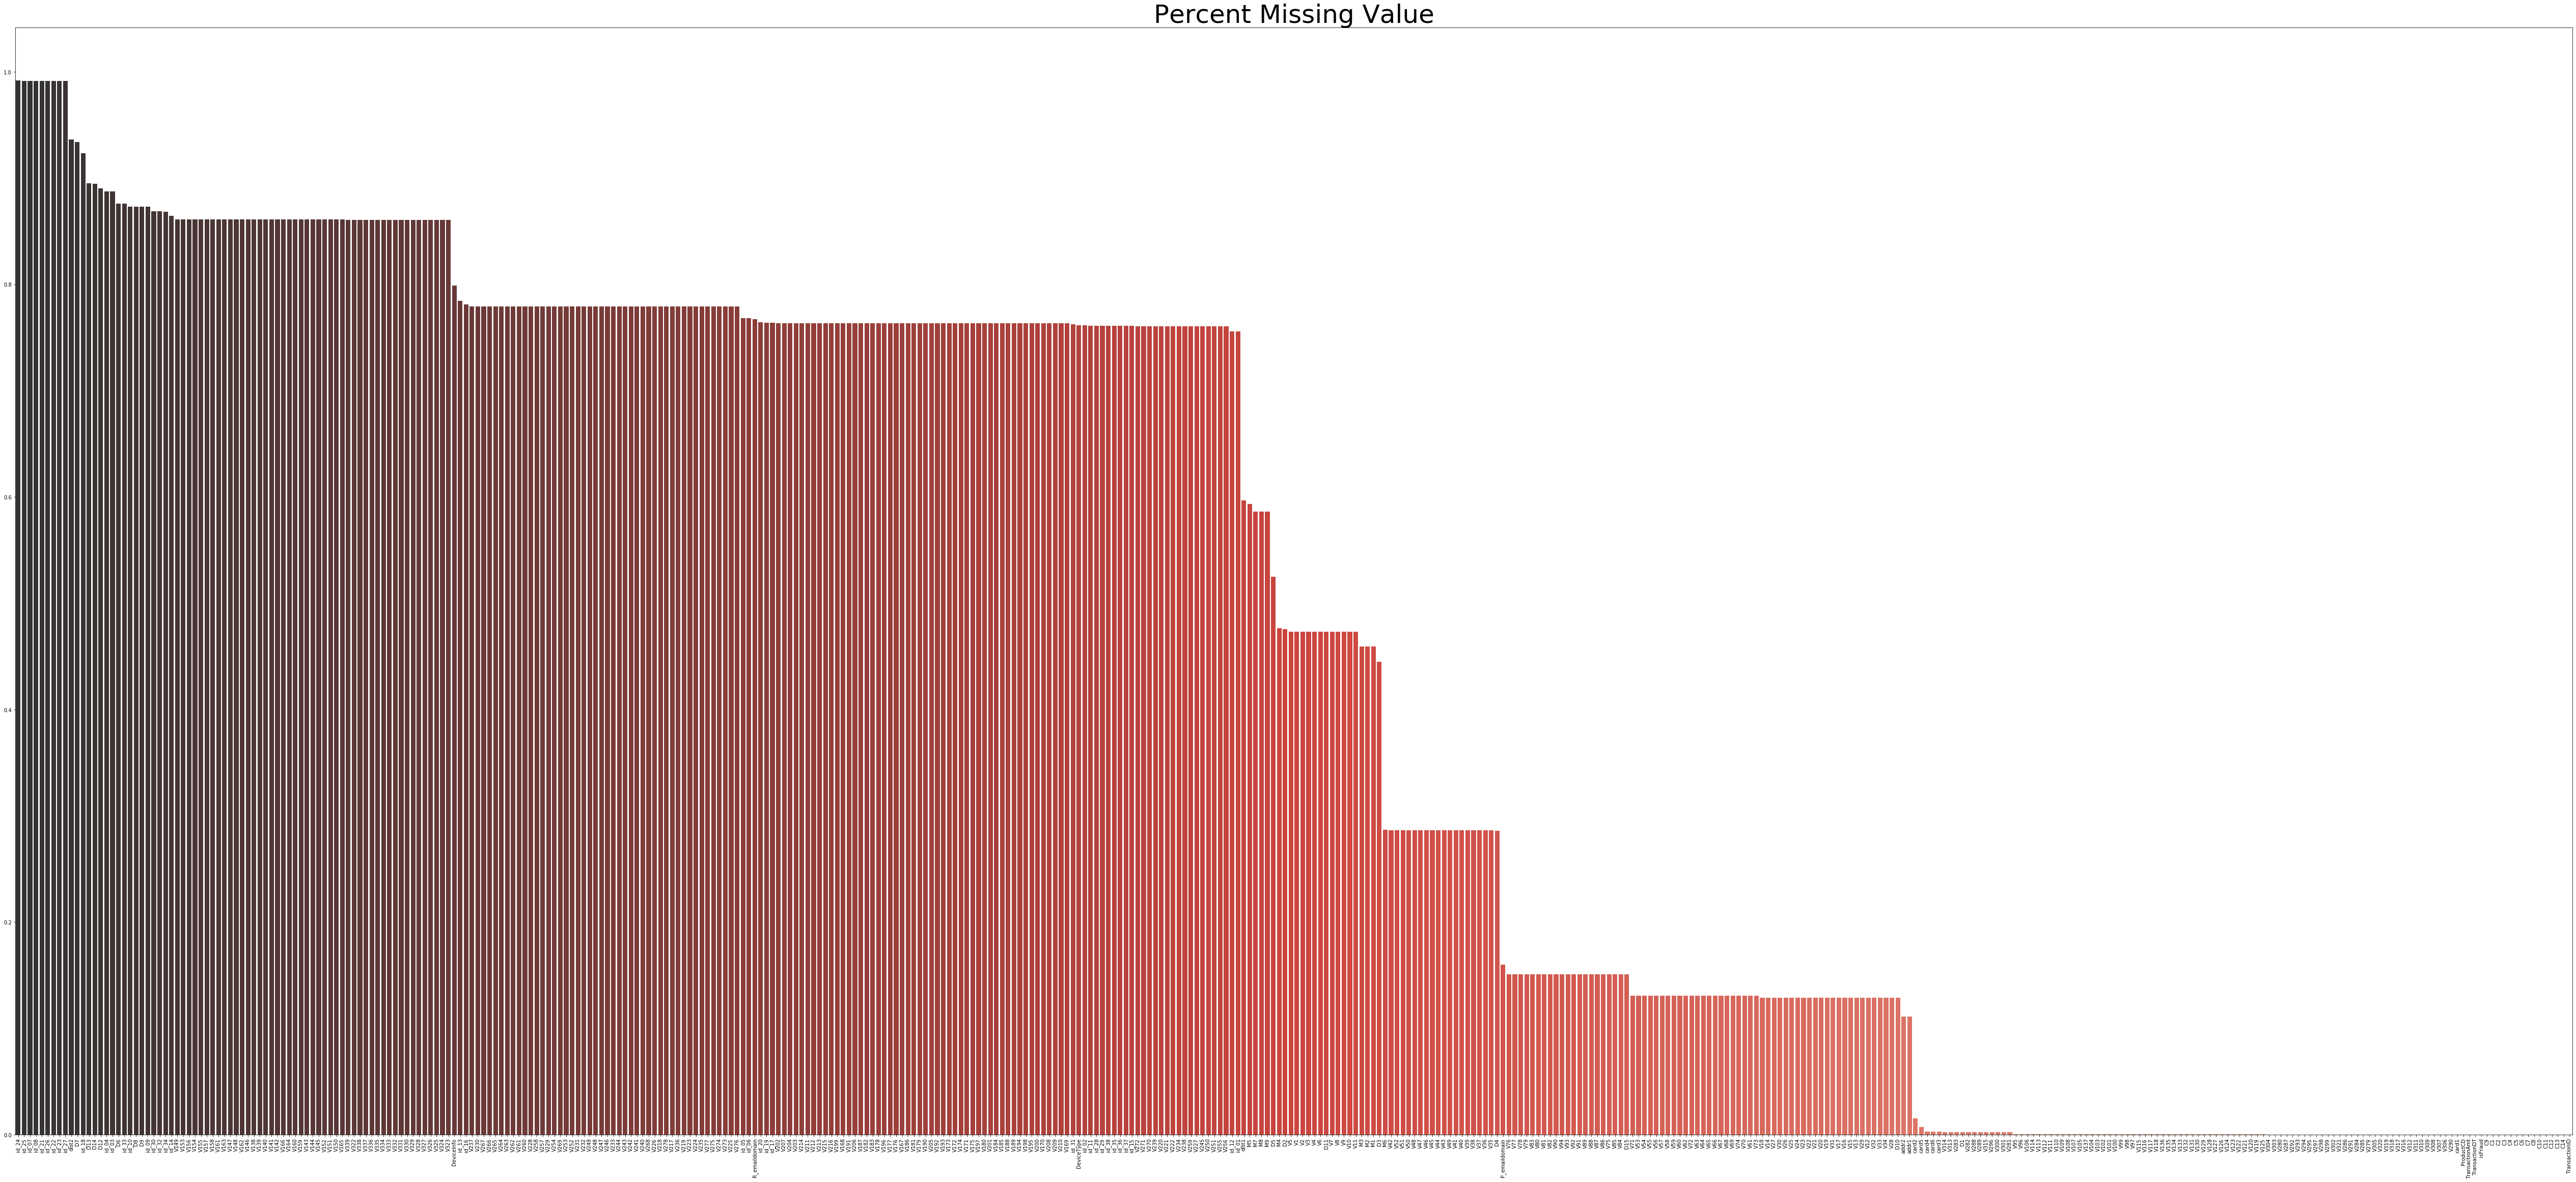

In [9]:
plt.figure(figsize=(90,40))
sns.barplot(y=train_full_df.isnull().sum().sort_values(ascending=False)/len(train_full_df),
            x=train_full_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

# Data Prep

In [10]:
from sklearn.model_selection import train_test_split

### Handling NAs: 
**Strategies for dealing with NAs:**
* Drop data
* Impute/recode NAs

In [11]:
columns_def = pd.DataFrame({"na_count":train_full_df.isnull().sum().sort_values(ascending=False)})

In [12]:
#Create column of percent columns, #higher is worst
columns_def["per"] = columns_def["na_count"]/len(train_full_df)

In [13]:
columns_def

,na_count,per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_22,585371,0.991247
id_23,585371,0.991247
id_27,585371,0.991247
dist2,552913,0.936284


In [14]:
#cycle throungh various limit for percent Na per column
range = [0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [15]:
for i in range: 
    print(columns_def[columns_def["per"]<i].shape[0]/train_full_df.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [16]:
limit = 0.15 #only columns w/ less 15% will remain

In [17]:
#Select final columns
columns_final = columns_def[columns_def["per"]<limit].index 

train_full_df = train_full_df[train_full_df.columns.intersection(columns_final)]

## Dealing with Categorical Variables

In [18]:
#Show categorical variables
train_full_df[train_full_df.select_dtypes(include=['object']).columns]


,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [19]:
card6_dummy_df = pd.get_dummies(train_full_df["card6"])
card4_dummy_df = pd.get_dummies(train_full_df["card4"])
ProductCD_dummy_df = pd.get_dummies(train_full_df["ProductCD"])

In [20]:
train_full_df.shape

(590540, 160)

In [21]:
train_full_df = pd.concat([train_full_df,ProductCD_dummy_df,card4_dummy_df,card6_dummy_df],axis=1)

In [22]:
train_full_df = train_full_df._get_numeric_data()
train_full_df = train_full_df.dropna()

len(train_full_df[train_full_df["isFraud"]==1])/len(train_full_df)*100

2.04579077462003

In [23]:
x_full_df = train_full_df.drop(["isFraud"],axis=1)
y_full_df = train_full_df["isFraud"]


In [99]:
X_train,X_test,y_train,y_test = train_test_split(x_full_df,y_full_df,test_size=0.25)

In [90]:
# This cell was an attempt to use SMOTE to deal with the imbalanced data. This did not improve any algorithm so I
# decided to do away from it. You may try if you would like.

#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state=27, ratio=1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


# Modeling

In [124]:
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score, accuracy_score, f1_score

In [101]:
# Use this so scale the training values of X_train
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

### Logistic Regression

In [102]:
lr = LogisticRegression(solver='lbfgs', max_iter=500)  
lr.fit(X_train, y_train)  

C:\Users\ZAP-DS\Anaconda3\envs\tf-test\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pred_lr = lr.predict(X_test)

In [105]:
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,106974,70,107044
1,2211,80,2291
All,109185,150,109335


In [137]:
rec_lr = recall_score(y_test, y_pred_lr)
rec_lr

0.034919249236141425

In [138]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.9791375131476654

In [139]:
f1_lr = f1_score(y_test, y_pred_lr)
f1_lr

0.06554690700532569

In [142]:
df_metric = pd.DataFrame([rec_lr, acc_lr, f1_lr], columns=['Logistic'], index=['Recall', 'Accuracy', 'F1 Score'])

### Decision Tree Classifier

In [109]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
dtc.score(X_test, y_test)

0.9745552659258243

In [111]:
y_pred_dtc = dtc.predict(X_test)

In [112]:
pd.crosstab(y_test, y_pred_dtc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,105532,1512,107044
1,1270,1021,2291
All,106802,2533,109335


In [146]:
rec_dtc = recall_score(y_test, y_pred_dtc)
rec_dtc

0.44565691837625493

In [147]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_dtc

0.9745552659258243

In [148]:
f1_dtc = f1_score(y_test, y_pred_dtc)
f1_dtc

0.42330016583747926

In [149]:
df_metric['DTC'] = [rec_dtc, acc_dtc, f1_dtc]

### Adaboost Classifier

In [125]:
#rng = np.random.RandomState(1)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [126]:
ada.score(X_test, y_test)

0.9793387295925366

In [127]:
y_pred_ada = ada.predict(X_test)

In [128]:
pd.crosstab(y_test, y_pred_ada, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,106963,81,107044
1,2178,113,2291
All,109141,194,109335


In [150]:
rec_ada = recall_score(y_test, y_pred_ada)
rec_ada

0.04932343954604976

In [151]:
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_ada

0.9793387295925366

In [152]:
f1_ada = f1_score(y_test, y_pred_ada)
f1_ada

0.09094567404426558

In [153]:
df_metric['ADA'] = [rec_ada, acc_ada, f1_ada]

### Stochastic Gradient Decent Classifier

In [158]:
sgd = SGDClassifier(loss="hinge", penalty="l2", alpha=0.001)
sgd.fit(X_train, y_train)    

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [159]:
sgd.score(X_test, y_test)

0.9773905885581012

In [160]:
y_pred_sgd = sgd.predict(X_test)

In [161]:
pd.crosstab(y_test, y_pred_sgd, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,106708,336,107044
1,2136,155,2291
All,108844,491,109335


In [162]:
rec_sgd = recall_score(y_test, y_pred_sgd)
rec_sgd

0.06765604539502401

In [163]:
acc_sgd = accuracy_score(y_test, y_pred_sgd)
acc_sgd

0.9773905885581012

In [164]:
f1_sgd = f1_score(y_test, y_pred_sgd)
f1_sgd

0.11143062544931703

In [165]:
df_metric['SGD'] = [rec_sgd, acc_sgd, f1_sgd]

### Gradient Boosting Classifier

In [116]:
gbc = GradientBoostingClassifier(n_estimators=20, max_depth=5)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [117]:
gbc.score(X_test, y_test)

0.9805734668678832

In [118]:
y_pred_gbc = gbc.predict(X_test)

In [119]:
pd.crosstab(y_test, y_pred_gbc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107009,35,107044
1,2089,202,2291
All,109098,237,109335


In [166]:
rec_gbc = recall_score(y_test, y_pred_gbc)
rec_gbc

0.08817110432125709

In [167]:
acc_gbc = accuracy_score(y_test, y_pred_gbc)
acc_gbc

0.9805734668678832

In [168]:
f1_gbc = f1_score(y_test, y_pred_gbc)
f1_gbc

0.15981012658227847

In [182]:
df_metric['GBC'] = [rec_gbc, acc_gbc, f1_gbc]

### Random Forest Classifier

In [171]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
y_pred_rfc = rfc.predict(X_test)

In [173]:
pd.crosstab(y_test, y_pred_rfc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107044,0,107044
1,159,2132,2291
All,107203,2132,109335


In [174]:
rec_rfc = recall_score(y_test, y_pred_rfc)
rec_rfc

0.930597992143169

In [175]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.9985457538757031

In [176]:
f1_rfc = f1_score(y_test, y_pred_rfc)
f1_rfc

0.9640515487225865

In [183]:
df_metric['RFC'] = [rec_rfc, acc_rfc, f1_rfc]

## Plotting

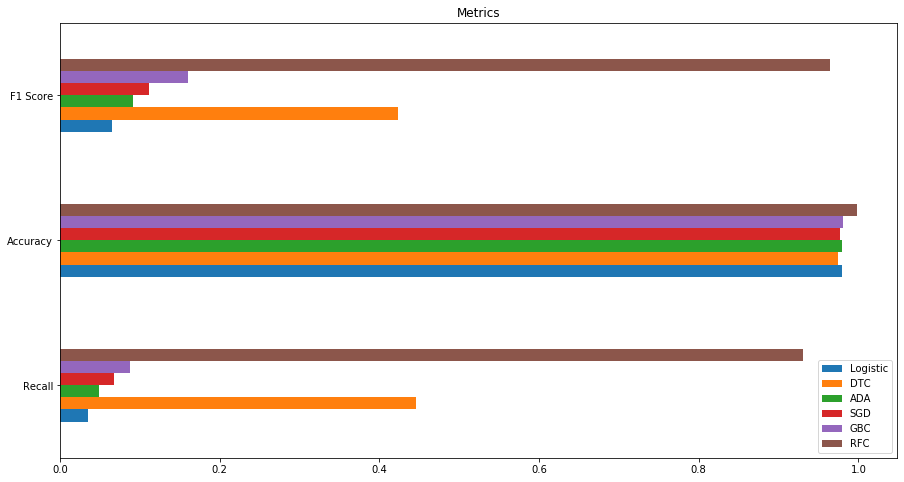

In [192]:
fig = df_metric.plot(kind='barh', title='Metrics', figsize = (15,8))
plt.savefig('Metrics.png')
plt.show()

In [185]:
df_metric.head()

,Logistic,DTC,ADA,SGD,GBC,RFC
Recall,0.034919,0.445657,0.049323,0.067656,0.088171,0.930598
Accuracy,0.979138,0.974555,0.979339,0.977391,0.980573,0.998546
F1 Score,0.065547,0.423300,0.090946,0.111431,0.159810,0.964052


From the figure we can see that the random forest classifier far outperforms all the other algorithms with the decision tree classifier having a F1 score and recall score of half that of the random forest classifier.